# 7:3 Train/Test Ratio

In [1]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error
import numpy

In [2]:
# Read data file
data = pd.read_csv('BIDV.csv')
df = data.reset_index()['Price']

In [3]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# Split train/test to train model
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
# Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

27/27 [==============================] - 5s 65ms/step - loss: 0.0206 - val_loss: 0.0048
Epoch 2/100
27/27 [==============================] - 1s 24ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 3/100
27/27 [==============================] - 1s 25ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 4/100
27/27 [==============================] - 1s 24ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 5/100
27/27 [==============================] - 1s 24ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 6/100
27/27 [==============================] - 1s 25ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 7/100
27/27 [==============================] - 1s 24ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 8/100
27/27 [==============================] - 1s 24ms/step - loss: 9.8501e-04 - val_loss: 0.0031
Epoch 9/100
27/27 [==============================] - 1s 24ms/step - loss: 8.3537e-04 - val_loss: 0.0030
Epoch 10/100
27/27 [==============================] - 1s 23ms/step - loss: 7.8422e-04 - val

27/27 [==============================] - 1s 24ms/step - loss: 2.5070e-04 - val_loss: 4.7170e-04
Epoch 77/100
27/27 [==============================] - 1s 28ms/step - loss: 2.2967e-04 - val_loss: 7.9530e-04
Epoch 78/100
27/27 [==============================] - 1s 24ms/step - loss: 2.0248e-04 - val_loss: 5.9113e-04
Epoch 79/100
27/27 [==============================] - 1s 27ms/step - loss: 1.9915e-04 - val_loss: 5.3105e-04
Epoch 80/100
27/27 [==============================] - 1s 35ms/step - loss: 1.9664e-04 - val_loss: 6.9581e-04
Epoch 81/100
27/27 [==============================] - 1s 33ms/step - loss: 1.9646e-04 - val_loss: 4.9056e-04
Epoch 82/100
27/27 [==============================] - 1s 37ms/step - loss: 1.9513e-04 - val_loss: 5.7266e-04
Epoch 83/100
27/27 [==============================] - 1s 38ms/step - loss: 1.9526e-04 - val_loss: 4.6026e-04
Epoch 84/100
27/27 [==============================] - 1s 36ms/step - loss: 1.9446e-04 - val_loss: 6.7921e-04
Epoch 85/100
27/27 [============

In [10]:
# Forecast test data
y_pred_lstm = model.predict(X_test)

y_pred_new_lstm = scaler.inverse_transform(y_pred_lstm.reshape(1, -1))
y_test_new_lstm = scaler.inverse_transform(np.array([y_test], dtype=np.float32))

23/23 [==============================] - 1s 7ms/step


In [11]:
# Chuẩn hóa dữ liệu y_pred_lstm
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

In [12]:
# Calculate RMSE,MAPE,MSLE 
test_score_rmse_lstm = np.sqrt(mean_squared_error(y_test_new_lstm, y_pred_new_lstm))
test_score_mape_lstm = mean_absolute_percentage_error(y_test_new_lstm, y_pred_new_lstm) * 100
test_score_msle_lstm = mean_squared_log_error(y_test_new_lstm, y_pred_new_lstm)

print('RMSE trên tập test là:', test_score_rmse_lstm)
print('MAPE trên tập test là:', test_score_mape_lstm)
print('MSLE trên tập test là:', test_score_msle_lstm)

RMSE trên tập test là: 888.3671
MAPE trên tập test là: 1.6756964847445488
MSLE trên tập test là: 0.0005374593


In [13]:
# 13. Forecast next 30 day
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    if(len(temp_input)>x_input.shape[1]):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.82413363]
683
1 day input [0.68242257 0.6679775  0.65834826 0.66701628 0.64583049 0.6525712
 0.63427395 0.61405182 0.63331273 0.63716491 0.59479335 0.61405182
 0.58516411 0.58227559 0.58708899 0.59479335 0.60057041 0.61212695
 0.59960918 0.58805264 0.60249771 0.61597913 0.62657202 0.62560837
 0.62079253 0.61019964 0.59286848 0.59286848 0.6111633  0.66701628
 0.69109058 0.704572   0.70360835 0.67953404 0.71323758 0.74308895
 0.72960753 0.71805342 0.74501626 0.748866   0.70649688 0.6679775
 0.68049769 0.65064633 0.67568186 0.6699048  0.6699048  0.67760917
 0.68916328 0.69397911 0.67182968 0.67182968 0.67953404 0.67568186
 0.68242257 0.70842175 0.70842175 0.71516246 0.71612611 0.71131271
 0.70360835 0.6525712  0.68145891 0.6872384  0.6699048  0.61405182
 0.62175619 0.62560837 0.62753324 0.62368349 0.56879417 0.59479335
 0.58901629 0.59479335 0.57938706 0.57553488 0.57938706 0.58516411
 0.59479335 0.59671822 0.62464471 0.64005344 0.63331273 0.63234908
 0.63138542 0.63620126 0.63908979 0

3 day output [[0.80675507]]
4 day input [0.66701628 0.64583049 0.6525712  0.63427395 0.61405182 0.63331273
 0.63716491 0.59479335 0.61405182 0.58516411 0.58227559 0.58708899
 0.59479335 0.60057041 0.61212695 0.59960918 0.58805264 0.60249771
 0.61597913 0.62657202 0.62560837 0.62079253 0.61019964 0.59286848
 0.59286848 0.6111633  0.66701628 0.69109058 0.704572   0.70360835
 0.67953404 0.71323758 0.74308895 0.72960753 0.71805342 0.74501626
 0.748866   0.70649688 0.6679775  0.68049769 0.65064633 0.67568186
 0.6699048  0.6699048  0.67760917 0.68916328 0.69397911 0.67182968
 0.67182968 0.67953404 0.67568186 0.68242257 0.70842175 0.70842175
 0.71516246 0.71612611 0.71131271 0.70360835 0.6525712  0.68145891
 0.6872384  0.6699048  0.61405182 0.62175619 0.62560837 0.62753324
 0.62368349 0.56879417 0.59479335 0.58901629 0.59479335 0.57938706
 0.57553488 0.57938706 0.58516411 0.59479335 0.59671822 0.62464471
 0.64005344 0.63331273 0.63234908 0.63138542 0.63620126 0.63908979
 0.6352376  0.62946055

6 day output [[0.79211164]]
7 day input [0.63427395 0.61405182 0.63331273 0.63716491 0.59479335 0.61405182
 0.58516411 0.58227559 0.58708899 0.59479335 0.60057041 0.61212695
 0.59960918 0.58805264 0.60249771 0.61597913 0.62657202 0.62560837
 0.62079253 0.61019964 0.59286848 0.59286848 0.6111633  0.66701628
 0.69109058 0.704572   0.70360835 0.67953404 0.71323758 0.74308895
 0.72960753 0.71805342 0.74501626 0.748866   0.70649688 0.6679775
 0.68049769 0.65064633 0.67568186 0.6699048  0.6699048  0.67760917
 0.68916328 0.69397911 0.67182968 0.67182968 0.67953404 0.67568186
 0.68242257 0.70842175 0.70842175 0.71516246 0.71612611 0.71131271
 0.70360835 0.6525712  0.68145891 0.6872384  0.6699048  0.61405182
 0.62175619 0.62560837 0.62753324 0.62368349 0.56879417 0.59479335
 0.58901629 0.59479335 0.57938706 0.57553488 0.57938706 0.58516411
 0.59479335 0.59671822 0.62464471 0.64005344 0.63331273 0.63234908
 0.63138542 0.63620126 0.63908979 0.6352376  0.62946055 0.62464471
 0.63908979 0.63234908 

9 day output [[0.7755415]]
10 day input [0.63716491 0.59479335 0.61405182 0.58516411 0.58227559 0.58708899
 0.59479335 0.60057041 0.61212695 0.59960918 0.58805264 0.60249771
 0.61597913 0.62657202 0.62560837 0.62079253 0.61019964 0.59286848
 0.59286848 0.6111633  0.66701628 0.69109058 0.704572   0.70360835
 0.67953404 0.71323758 0.74308895 0.72960753 0.71805342 0.74501626
 0.748866   0.70649688 0.6679775  0.68049769 0.65064633 0.67568186
 0.6699048  0.6699048  0.67760917 0.68916328 0.69397911 0.67182968
 0.67182968 0.67953404 0.67568186 0.68242257 0.70842175 0.70842175
 0.71516246 0.71612611 0.71131271 0.70360835 0.6525712  0.68145891
 0.6872384  0.6699048  0.61405182 0.62175619 0.62560837 0.62753324
 0.62368349 0.56879417 0.59479335 0.58901629 0.59479335 0.57938706
 0.57553488 0.57938706 0.58516411 0.59479335 0.59671822 0.62464471
 0.64005344 0.63331273 0.63234908 0.63138542 0.63620126 0.63908979
 0.6352376  0.62946055 0.62464471 0.63908979 0.63234908 0.62657202
 0.62368349 0.58516411

12 day output [[0.7561984]]
13 day input [0.58516411 0.58227559 0.58708899 0.59479335 0.60057041 0.61212695
 0.59960918 0.58805264 0.60249771 0.61597913 0.62657202 0.62560837
 0.62079253 0.61019964 0.59286848 0.59286848 0.6111633  0.66701628
 0.69109058 0.704572   0.70360835 0.67953404 0.71323758 0.74308895
 0.72960753 0.71805342 0.74501626 0.748866   0.70649688 0.6679775
 0.68049769 0.65064633 0.67568186 0.6699048  0.6699048  0.67760917
 0.68916328 0.69397911 0.67182968 0.67182968 0.67953404 0.67568186
 0.68242257 0.70842175 0.70842175 0.71516246 0.71612611 0.71131271
 0.70360835 0.6525712  0.68145891 0.6872384  0.6699048  0.61405182
 0.62175619 0.62560837 0.62753324 0.62368349 0.56879417 0.59479335
 0.58901629 0.59479335 0.57938706 0.57553488 0.57938706 0.58516411
 0.59479335 0.59671822 0.62464471 0.64005344 0.63331273 0.63234908
 0.63138542 0.63620126 0.63908979 0.6352376  0.62946055 0.62464471
 0.63908979 0.63234908 0.62657202 0.62368349 0.58516411 0.56205346
 0.56397833 0.56494199

15 day output [[0.73486054]]
16 day input [0.59479335 0.60057041 0.61212695 0.59960918 0.58805264 0.60249771
 0.61597913 0.62657202 0.62560837 0.62079253 0.61019964 0.59286848
 0.59286848 0.6111633  0.66701628 0.69109058 0.704572   0.70360835
 0.67953404 0.71323758 0.74308895 0.72960753 0.71805342 0.74501626
 0.748866   0.70649688 0.6679775  0.68049769 0.65064633 0.67568186
 0.6699048  0.6699048  0.67760917 0.68916328 0.69397911 0.67182968
 0.67182968 0.67953404 0.67568186 0.68242257 0.70842175 0.70842175
 0.71516246 0.71612611 0.71131271 0.70360835 0.6525712  0.68145891
 0.6872384  0.6699048  0.61405182 0.62175619 0.62560837 0.62753324
 0.62368349 0.56879417 0.59479335 0.58901629 0.59479335 0.57938706
 0.57553488 0.57938706 0.58516411 0.59479335 0.59671822 0.62464471
 0.64005344 0.63331273 0.63234908 0.63138542 0.63620126 0.63908979
 0.6352376  0.62946055 0.62464471 0.63908979 0.63234908 0.62657202
 0.62368349 0.58516411 0.56205346 0.56397833 0.56494199 0.54857204
 0.55049691 0.564941

17 day output [[0.72000164]]
18 day input [0.61212695 0.59960918 0.58805264 0.60249771 0.61597913 0.62657202
 0.62560837 0.62079253 0.61019964 0.59286848 0.59286848 0.6111633
 0.66701628 0.69109058 0.704572   0.70360835 0.67953404 0.71323758
 0.74308895 0.72960753 0.71805342 0.74501626 0.748866   0.70649688
 0.6679775  0.68049769 0.65064633 0.67568186 0.6699048  0.6699048
 0.67760917 0.68916328 0.69397911 0.67182968 0.67182968 0.67953404
 0.67568186 0.68242257 0.70842175 0.70842175 0.71516246 0.71612611
 0.71131271 0.70360835 0.6525712  0.68145891 0.6872384  0.6699048
 0.61405182 0.62175619 0.62560837 0.62753324 0.62368349 0.56879417
 0.59479335 0.58901629 0.59479335 0.57938706 0.57553488 0.57938706
 0.58516411 0.59479335 0.59671822 0.62464471 0.64005344 0.63331273
 0.63234908 0.63138542 0.63620126 0.63908979 0.6352376  0.62946055
 0.62464471 0.63908979 0.63234908 0.62657202 0.62368349 0.58516411
 0.56205346 0.56397833 0.56494199 0.54857204 0.55049691 0.56494199
 0.55531275 0.55627397 

20 day output [[0.6974527]]
21 day input [0.60249771 0.61597913 0.62657202 0.62560837 0.62079253 0.61019964
 0.59286848 0.59286848 0.6111633  0.66701628 0.69109058 0.704572
 0.70360835 0.67953404 0.71323758 0.74308895 0.72960753 0.71805342
 0.74501626 0.748866   0.70649688 0.6679775  0.68049769 0.65064633
 0.67568186 0.6699048  0.6699048  0.67760917 0.68916328 0.69397911
 0.67182968 0.67182968 0.67953404 0.67568186 0.68242257 0.70842175
 0.70842175 0.71516246 0.71612611 0.71131271 0.70360835 0.6525712
 0.68145891 0.6872384  0.6699048  0.61405182 0.62175619 0.62560837
 0.62753324 0.62368349 0.56879417 0.59479335 0.58901629 0.59479335
 0.57938706 0.57553488 0.57938706 0.58516411 0.59479335 0.59671822
 0.62464471 0.64005344 0.63331273 0.63234908 0.63138542 0.63620126
 0.63908979 0.6352376  0.62946055 0.62464471 0.63908979 0.63234908
 0.62657202 0.62368349 0.58516411 0.56205346 0.56397833 0.56494199
 0.54857204 0.55049691 0.56494199 0.55531275 0.55627397 0.55820128
 0.56975539 0.56783051 0

23 day output [[0.6753728]]
24 day input [0.62560837 0.62079253 0.61019964 0.59286848 0.59286848 0.6111633
 0.66701628 0.69109058 0.704572   0.70360835 0.67953404 0.71323758
 0.74308895 0.72960753 0.71805342 0.74501626 0.748866   0.70649688
 0.6679775  0.68049769 0.65064633 0.67568186 0.6699048  0.6699048
 0.67760917 0.68916328 0.69397911 0.67182968 0.67182968 0.67953404
 0.67568186 0.68242257 0.70842175 0.70842175 0.71516246 0.71612611
 0.71131271 0.70360835 0.6525712  0.68145891 0.6872384  0.6699048
 0.61405182 0.62175619 0.62560837 0.62753324 0.62368349 0.56879417
 0.59479335 0.58901629 0.59479335 0.57938706 0.57553488 0.57938706
 0.58516411 0.59479335 0.59671822 0.62464471 0.64005344 0.63331273
 0.63234908 0.63138542 0.63620126 0.63908979 0.6352376  0.62946055
 0.62464471 0.63908979 0.63234908 0.62657202 0.62368349 0.58516411
 0.56205346 0.56397833 0.56494199 0.54857204 0.55049691 0.56494199
 0.55531275 0.55627397 0.55820128 0.56975539 0.56783051 0.5716827
 0.56879417 0.55916493 0.

26 day output [[0.6545468]]
27 day input [0.59286848 0.59286848 0.6111633  0.66701628 0.69109058 0.704572
 0.70360835 0.67953404 0.71323758 0.74308895 0.72960753 0.71805342
 0.74501626 0.748866   0.70649688 0.6679775  0.68049769 0.65064633
 0.67568186 0.6699048  0.6699048  0.67760917 0.68916328 0.69397911
 0.67182968 0.67182968 0.67953404 0.67568186 0.68242257 0.70842175
 0.70842175 0.71516246 0.71612611 0.71131271 0.70360835 0.6525712
 0.68145891 0.6872384  0.6699048  0.61405182 0.62175619 0.62560837
 0.62753324 0.62368349 0.56879417 0.59479335 0.58901629 0.59479335
 0.57938706 0.57553488 0.57938706 0.58516411 0.59479335 0.59671822
 0.62464471 0.64005344 0.63331273 0.63234908 0.63138542 0.63620126
 0.63908979 0.6352376  0.62946055 0.62464471 0.63908979 0.63234908
 0.62657202 0.62368349 0.58516411 0.56205346 0.56397833 0.56494199
 0.54857204 0.55049691 0.56494199 0.55531275 0.55627397 0.55820128
 0.56975539 0.56783051 0.5716827  0.56879417 0.55916493 0.55049691
 0.55242422 0.56397833 0

29 day output [[0.6355989]]


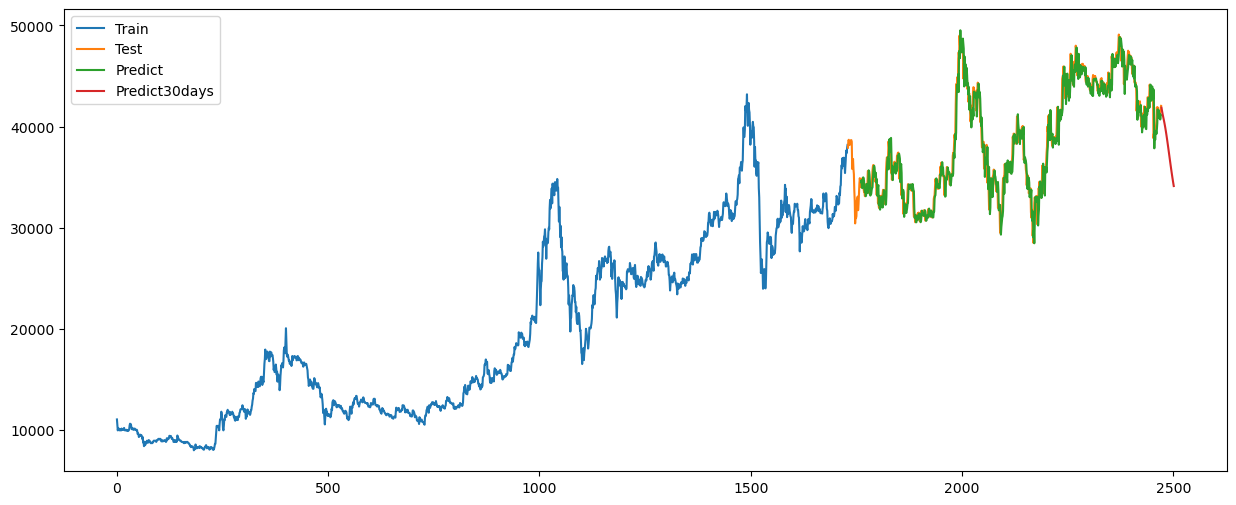

In [14]:
# Plot 
plt.figure(figsize=(15, 6))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+31, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred_lstm)

predict_data_index = pd.RangeIndex(start=len(df), stop=len(df)+30, step=1)
plt.plot(predict_data_index, scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

# 8:2 Train/Test Ratio

In [15]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error
import numpy

In [16]:
# Read data file
data = pd.read_csv('BIDV.csv')
df = data.reset_index()['Price']
df

0       11054.8
1       10574.2
2        9973.4
3       10213.7
4       10153.6
         ...   
2467    41000.0
2468    41200.0
2469    41300.0
2470    41800.0
2471    42050.0
Name: Price, Length: 2472, dtype: float64

In [17]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [18]:
# Split train/test to train model
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [19]:
# Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [21]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
# 9. Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
31/31 [==============================] - 5s 50ms/step - loss: 0.0176 - val_loss: 0.0097
Epoch 2/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 3/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0016 - val_loss: 0.0056
Epoch 4/100
31/31 [==============================] - 1s 26ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 5/100
31/31 [==============================] - 1s 26ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 6/100
31/31 [==============================] - 1s 29ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 7/100
31/31 [==============================] - 1s 29ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 8/100
31/31 [==============================] - 1s 29ms/step - loss: 0.0010 - val_loss: 0.0027
Epoch 9/100
31/31 [==============================] - 1s 27ms/step - loss: 0.0010 - val_loss: 0.0042
Epoch 10/100
31/31 [==============================] - 1s 24ms/step - loss: 9.7347e-04 - val_loss: 0.

31/31 [==============================] - 1s 24ms/step - loss: 2.2162e-04 - val_loss: 5.7879e-04
Epoch 79/100
31/31 [==============================] - 1s 26ms/step - loss: 2.1493e-04 - val_loss: 4.9947e-04
Epoch 80/100
31/31 [==============================] - 1s 27ms/step - loss: 2.3673e-04 - val_loss: 5.1288e-04
Epoch 81/100
31/31 [==============================] - 1s 29ms/step - loss: 2.1967e-04 - val_loss: 5.0717e-04
Epoch 82/100
31/31 [==============================] - 1s 25ms/step - loss: 2.7944e-04 - val_loss: 8.6231e-04
Epoch 83/100
31/31 [==============================] - 1s 24ms/step - loss: 3.2523e-04 - val_loss: 6.1914e-04
Epoch 84/100
31/31 [==============================] - 1s 25ms/step - loss: 2.3621e-04 - val_loss: 6.2613e-04
Epoch 85/100
31/31 [==============================] - 1s 24ms/step - loss: 2.0689e-04 - val_loss: 4.9599e-04
Epoch 86/100
31/31 [==============================] - 1s 24ms/step - loss: 2.0835e-04 - val_loss: 0.0011
Epoch 87/100
31/31 [================

In [24]:
# Forecast test data
y_pred_lstm = model.predict(X_test)

y_pred_new_lstm = scaler.inverse_transform(y_pred_lstm.reshape(1, -1))
y_test_new_lstm = scaler.inverse_transform(np.array([y_test], dtype=np.float32))

15/15 [==============================] - 1s 6ms/step


In [25]:
# Chuẩn hóa dữ liệu y_pred_lstm
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

In [26]:
# Calculate RMSE,MAPE,MSLE 
test_score_rmse_lstm = np.sqrt(mean_squared_error(y_test_new_lstm, y_pred_new_lstm))
test_score_mape_lstm = mean_absolute_percentage_error(y_test_new_lstm, y_pred_new_lstm) * 100
test_score_msle_lstm = mean_squared_log_error(y_test_new_lstm, y_pred_new_lstm)

print('RMSE trên tập test là:', test_score_rmse_lstm)
print('MAPE trên tập test là:', test_score_mape_lstm)
print('MSLE trên tập test là:', test_score_msle_lstm)

RMSE trên tập test là: 924.2989
MAPE trên tập test là: 1.74716766923666
MSLE trên tập test là: 0.00057062047


In [27]:
# 13. Forecast next 30 day
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    if(len(temp_input)>x_input.shape[1]):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.82764226]
436
1 day input [0.88197676 0.8588588  0.86372574 0.85277513 0.82479023 0.78950494
 0.80045555 0.79072167 0.76152004 0.72866821 0.72866821 0.72866821
 0.74205229 0.74205229 0.67756536 0.70311679 0.71041719 0.69824985
 0.71163393 0.71163393 0.73475188 0.70555026 0.6434968  0.67634863
 0.68364904 0.62281231 0.57900987 0.58874375 0.6434968  0.65444741
 0.64836374 0.64471353 0.61672864 0.62646251 0.65444741 0.65931435
 0.66418128 0.67513189 0.66418128 0.66053108 0.64958047 0.64106333
 0.63741313 0.62281231 0.63984659 0.64471353 0.62767925 0.58266007
 0.59117721 0.58387681 0.59117721 0.57414293 0.52304008 0.54250784
 0.54737477 0.55954212 0.56440906 0.57779314 0.62402905 0.65444741
 0.62037884 0.65809761 0.65809761 0.68851597 0.67148169 0.68851597
 0.65688088 0.64471353 0.69094944 0.6824323  0.68486577 0.67634863
 0.66904822 0.67269843 0.69094944 0.69338291 0.66904822 0.66661475
 0.67026496 0.67026496 0.69338291 0.71285066 0.75421964 0.74205229
 0.76152004 0.76152004 0.75421964

4 day output [[0.82403225]]
5 day input [0.82479023 0.78950494 0.80045555 0.79072167 0.76152004 0.72866821
 0.72866821 0.72866821 0.74205229 0.74205229 0.67756536 0.70311679
 0.71041719 0.69824985 0.71163393 0.71163393 0.73475188 0.70555026
 0.6434968  0.67634863 0.68364904 0.62281231 0.57900987 0.58874375
 0.6434968  0.65444741 0.64836374 0.64471353 0.61672864 0.62646251
 0.65444741 0.65931435 0.66418128 0.67513189 0.66418128 0.66053108
 0.64958047 0.64106333 0.63741313 0.62281231 0.63984659 0.64471353
 0.62767925 0.58266007 0.59117721 0.58387681 0.59117721 0.57414293
 0.52304008 0.54250784 0.54737477 0.55954212 0.56440906 0.57779314
 0.62402905 0.65444741 0.62037884 0.65809761 0.65809761 0.68851597
 0.67148169 0.68851597 0.65688088 0.64471353 0.69094944 0.6824323
 0.68486577 0.67634863 0.66904822 0.67269843 0.69094944 0.69338291
 0.66904822 0.66661475 0.67026496 0.67026496 0.69338291 0.71285066
 0.75421964 0.74205229 0.76152004 0.76152004 0.75421964 0.7493527
 0.74570249 0.73961882 0

8 day output [[0.821498]]
9 day input [0.76152004 0.72866821 0.72866821 0.72866821 0.74205229 0.74205229
 0.67756536 0.70311679 0.71041719 0.69824985 0.71163393 0.71163393
 0.73475188 0.70555026 0.6434968  0.67634863 0.68364904 0.62281231
 0.57900987 0.58874375 0.6434968  0.65444741 0.64836374 0.64471353
 0.61672864 0.62646251 0.65444741 0.65931435 0.66418128 0.67513189
 0.66418128 0.66053108 0.64958047 0.64106333 0.63741313 0.62281231
 0.63984659 0.64471353 0.62767925 0.58266007 0.59117721 0.58387681
 0.59117721 0.57414293 0.52304008 0.54250784 0.54737477 0.55954212
 0.56440906 0.57779314 0.62402905 0.65444741 0.62037884 0.65809761
 0.65809761 0.68851597 0.67148169 0.68851597 0.65688088 0.64471353
 0.69094944 0.6824323  0.68486577 0.67634863 0.66904822 0.67269843
 0.69094944 0.69338291 0.66904822 0.66661475 0.67026496 0.67026496
 0.69338291 0.71285066 0.75421964 0.74205229 0.76152004 0.76152004
 0.75421964 0.7493527  0.74570249 0.73961882 0.73718535 0.75908657
 0.80288901 0.79072167 0

11 day output [[0.8187418]]
12 day input [0.72866821 0.74205229 0.74205229 0.67756536 0.70311679 0.71041719
 0.69824985 0.71163393 0.71163393 0.73475188 0.70555026 0.6434968
 0.67634863 0.68364904 0.62281231 0.57900987 0.58874375 0.6434968
 0.65444741 0.64836374 0.64471353 0.61672864 0.62646251 0.65444741
 0.65931435 0.66418128 0.67513189 0.66418128 0.66053108 0.64958047
 0.64106333 0.63741313 0.62281231 0.63984659 0.64471353 0.62767925
 0.58266007 0.59117721 0.58387681 0.59117721 0.57414293 0.52304008
 0.54250784 0.54737477 0.55954212 0.56440906 0.57779314 0.62402905
 0.65444741 0.62037884 0.65809761 0.65809761 0.68851597 0.67148169
 0.68851597 0.65688088 0.64471353 0.69094944 0.6824323  0.68486577
 0.67634863 0.66904822 0.67269843 0.69094944 0.69338291 0.66904822
 0.66661475 0.67026496 0.67026496 0.69338291 0.71285066 0.75421964
 0.74205229 0.76152004 0.76152004 0.75421964 0.7493527  0.74570249
 0.73961882 0.73718535 0.75908657 0.80288901 0.79072167 0.77855432
 0.76882045 0.76273678 

14 day output [[0.8154042]]
15 day input [0.67756536 0.70311679 0.71041719 0.69824985 0.71163393 0.71163393
 0.73475188 0.70555026 0.6434968  0.67634863 0.68364904 0.62281231
 0.57900987 0.58874375 0.6434968  0.65444741 0.64836374 0.64471353
 0.61672864 0.62646251 0.65444741 0.65931435 0.66418128 0.67513189
 0.66418128 0.66053108 0.64958047 0.64106333 0.63741313 0.62281231
 0.63984659 0.64471353 0.62767925 0.58266007 0.59117721 0.58387681
 0.59117721 0.57414293 0.52304008 0.54250784 0.54737477 0.55954212
 0.56440906 0.57779314 0.62402905 0.65444741 0.62037884 0.65809761
 0.65809761 0.68851597 0.67148169 0.68851597 0.65688088 0.64471353
 0.69094944 0.6824323  0.68486577 0.67634863 0.66904822 0.67269843
 0.69094944 0.69338291 0.66904822 0.66661475 0.67026496 0.67026496
 0.69338291 0.71285066 0.75421964 0.74205229 0.76152004 0.76152004
 0.75421964 0.7493527  0.74570249 0.73961882 0.73718535 0.75908657
 0.80288901 0.79072167 0.77855432 0.76882045 0.76273678 0.74083556
 0.76638698 0.7615200

18 day output [[0.81049347]]
19 day input [0.71163393 0.71163393 0.73475188 0.70555026 0.6434968  0.67634863
 0.68364904 0.62281231 0.57900987 0.58874375 0.6434968  0.65444741
 0.64836374 0.64471353 0.61672864 0.62646251 0.65444741 0.65931435
 0.66418128 0.67513189 0.66418128 0.66053108 0.64958047 0.64106333
 0.63741313 0.62281231 0.63984659 0.64471353 0.62767925 0.58266007
 0.59117721 0.58387681 0.59117721 0.57414293 0.52304008 0.54250784
 0.54737477 0.55954212 0.56440906 0.57779314 0.62402905 0.65444741
 0.62037884 0.65809761 0.65809761 0.68851597 0.67148169 0.68851597
 0.65688088 0.64471353 0.69094944 0.6824323  0.68486577 0.67634863
 0.66904822 0.67269843 0.69094944 0.69338291 0.66904822 0.66661475
 0.67026496 0.67026496 0.69338291 0.71285066 0.75421964 0.74205229
 0.76152004 0.76152004 0.75421964 0.7493527  0.74570249 0.73961882
 0.73718535 0.75908657 0.80288901 0.79072167 0.77855432 0.76882045
 0.76273678 0.74083556 0.76638698 0.76152004 0.76152004 0.76395351
 0.75421964 0.773687

22 day output [[0.80556965]]
23 day input [0.6434968  0.67634863 0.68364904 0.62281231 0.57900987 0.58874375
 0.6434968  0.65444741 0.64836374 0.64471353 0.61672864 0.62646251
 0.65444741 0.65931435 0.66418128 0.67513189 0.66418128 0.66053108
 0.64958047 0.64106333 0.63741313 0.62281231 0.63984659 0.64471353
 0.62767925 0.58266007 0.59117721 0.58387681 0.59117721 0.57414293
 0.52304008 0.54250784 0.54737477 0.55954212 0.56440906 0.57779314
 0.62402905 0.65444741 0.62037884 0.65809761 0.65809761 0.68851597
 0.67148169 0.68851597 0.65688088 0.64471353 0.69094944 0.6824323
 0.68486577 0.67634863 0.66904822 0.67269843 0.69094944 0.69338291
 0.66904822 0.66661475 0.67026496 0.67026496 0.69338291 0.71285066
 0.75421964 0.74205229 0.76152004 0.76152004 0.75421964 0.7493527
 0.74570249 0.73961882 0.73718535 0.75908657 0.80288901 0.79072167
 0.77855432 0.76882045 0.76273678 0.74083556 0.76638698 0.76152004
 0.76152004 0.76395351 0.75421964 0.77368739 0.77855432 0.76638698
 0.77977106 0.72501801

26 day output [[0.8010466]]
27 day input [0.57900987 0.58874375 0.6434968  0.65444741 0.64836374 0.64471353
 0.61672864 0.62646251 0.65444741 0.65931435 0.66418128 0.67513189
 0.66418128 0.66053108 0.64958047 0.64106333 0.63741313 0.62281231
 0.63984659 0.64471353 0.62767925 0.58266007 0.59117721 0.58387681
 0.59117721 0.57414293 0.52304008 0.54250784 0.54737477 0.55954212
 0.56440906 0.57779314 0.62402905 0.65444741 0.62037884 0.65809761
 0.65809761 0.68851597 0.67148169 0.68851597 0.65688088 0.64471353
 0.69094944 0.6824323  0.68486577 0.67634863 0.66904822 0.67269843
 0.69094944 0.69338291 0.66904822 0.66661475 0.67026496 0.67026496
 0.69338291 0.71285066 0.75421964 0.74205229 0.76152004 0.76152004
 0.75421964 0.7493527  0.74570249 0.73961882 0.73718535 0.75908657
 0.80288901 0.79072167 0.77855432 0.76882045 0.76273678 0.74083556
 0.76638698 0.76152004 0.76152004 0.76395351 0.75421964 0.77368739
 0.77855432 0.76638698 0.77977106 0.72501801 0.69824985 0.70555026
 0.70311679 0.7006833

29 day output [[0.79808944]]


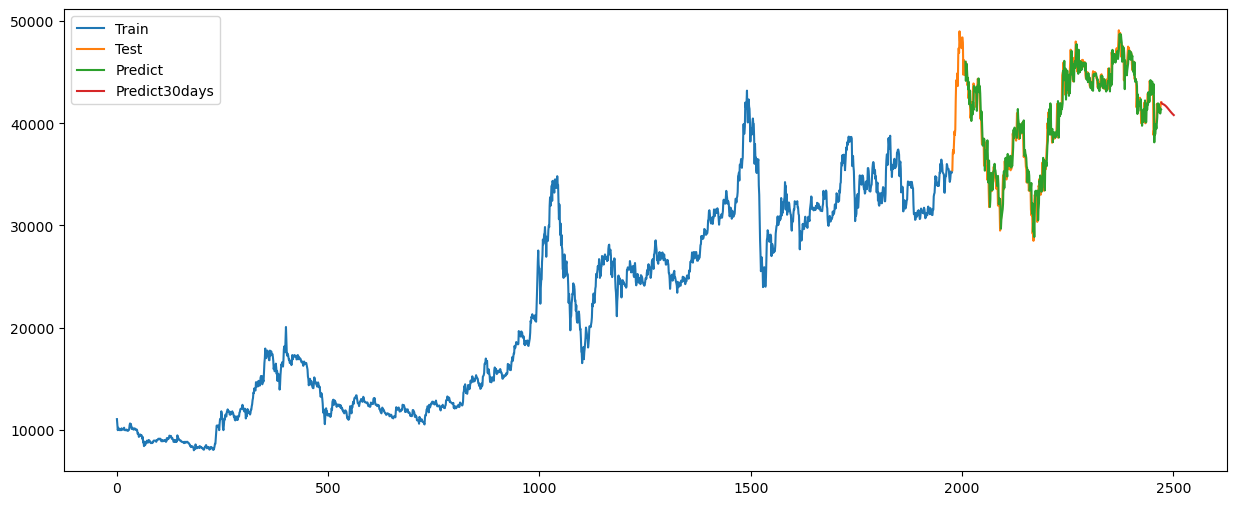

In [28]:
# Plot 
plt.figure(figsize=(15, 6))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+31, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred_lstm)

predict_data_index = pd.RangeIndex(start=len(df), stop=len(df)+30, step=1)
plt.plot(predict_data_index, scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

# 9:1 Train/Test Ratio

In [29]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error
import numpy

In [30]:
# Read data file
data = pd.read_csv('BIDV.csv')
df = data.reset_index()['Price']
df

0       11054.8
1       10574.2
2        9973.4
3       10213.7
4       10153.6
         ...   
2467    41000.0
2468    41200.0
2469    41300.0
2470    41800.0
2471    42050.0
Name: Price, Length: 2472, dtype: float64

In [31]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [32]:
# Split train/test to train model
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [33]:
# Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [35]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
# 9. Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
35/35 [==============================] - 6s 59ms/step - loss: 0.0265 - val_loss: 0.0240
Epoch 2/100
35/35 [==============================] - 1s 28ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 3/100
35/35 [==============================] - 1s 30ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 4/100
35/35 [==============================] - 1s 25ms/step - loss: 0.0019 - val_loss: 0.0039
Epoch 5/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 6/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 7/100
35/35 [==============================] - 1s 22ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 8/100
35/35 [==============================] - 1s 22ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 9/100
35/35 [==============================] - 1s 22ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 10/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0012 - val_loss: 0.0012

Epoch 78/100
35/35 [==============================] - 1s 26ms/step - loss: 3.3432e-04 - val_loss: 0.0016
Epoch 79/100
35/35 [==============================] - 1s 28ms/step - loss: 2.9068e-04 - val_loss: 3.2792e-04
Epoch 80/100
35/35 [==============================] - 1s 22ms/step - loss: 3.0643e-04 - val_loss: 6.5377e-04
Epoch 81/100
35/35 [==============================] - 1s 26ms/step - loss: 2.7634e-04 - val_loss: 4.0944e-04
Epoch 82/100
35/35 [==============================] - 1s 23ms/step - loss: 2.5612e-04 - val_loss: 3.2468e-04
Epoch 83/100
35/35 [==============================] - 1s 23ms/step - loss: 2.5738e-04 - val_loss: 6.0289e-04
Epoch 84/100
35/35 [==============================] - 1s 24ms/step - loss: 2.7322e-04 - val_loss: 7.0515e-04
Epoch 85/100
35/35 [==============================] - 1s 21ms/step - loss: 2.6682e-04 - val_loss: 3.2654e-04
Epoch 86/100
35/35 [==============================] - 1s 20ms/step - loss: 2.8853e-04 - val_loss: 3.7715e-04
Epoch 87/100
35/35 [===

In [38]:
# Forecast test data
y_pred_lstm = model.predict(X_test)

y_pred_new_lstm = scaler.inverse_transform(y_pred_lstm.reshape(1, -1))
y_test_new_lstm = scaler.inverse_transform(np.array([y_test], dtype=np.float32))

7/7 [==============================] - 1s 5ms/step


In [39]:
# Chuẩn hóa dữ liệu y_pred_lstm
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

In [40]:
# Calculate RMSE,MAPE,MSLE 
test_score_rmse_lstm = np.sqrt(mean_squared_error(y_test_new_lstm, y_pred_new_lstm))
test_score_mape_lstm = mean_absolute_percentage_error(y_test_new_lstm, y_pred_new_lstm) * 100
test_score_msle_lstm = mean_squared_log_error(y_test_new_lstm, y_pred_new_lstm)

print('RMSE trên tập test là:', test_score_rmse_lstm)
print('MAPE trên tập test là:', test_score_mape_lstm)
print('MSLE trên tập test là:', test_score_msle_lstm)

RMSE trên tập test là: 865.50586
MAPE trên tập test là: 1.4872673898935318
MSLE trên tập test là: 0.0003905107


In [41]:
# 13. Forecast next 30 day
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    if(len(temp_input)>x_input.shape[1]):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.8205797]
189
1 day input [0.9294294  0.9294294  0.92212899 0.92456246 0.91239512 0.92456246
 0.91604532 0.89292737 0.88562696 0.88562696 0.89901104 0.88684369
 0.90022777 0.8904939  0.88562696 0.8904939  0.88076002 0.86859268
 0.86494247 0.87832655 0.87345961 0.86372574 0.86980941 0.862509
 0.89292737 0.90266124 0.90022777 0.90022777 0.90022777 0.8977943
 0.90022777 0.89536083 0.89171063 0.88562696 0.88562696 0.87224288
 0.86372574 0.86980941 0.86129227 0.87345961 0.87102615 0.87589308
 0.87345961 0.89292737 0.89292737 0.89536083 0.88441022 0.86859268
 0.862509   0.86737594 0.88441022 0.87589308 0.87224288 0.86859268
 0.8588588  0.86372574 0.86129227 0.87467635 0.88319349 0.88319349
 0.88319349 0.90874491 0.88806043 0.86007553 0.88806043 0.87589308
 0.88441022 0.87467635 0.88319349 0.94768042 0.93794654 0.94159674
 0.94646368 0.94281348 0.9294294  0.94159674 0.93064613 0.93064613
 0.94281348 0.94403021 0.95254736 0.95741429 0.94159674 0.94159674
 0.95376409 0.97809878 1.         0.9

5 day output [[0.78318274]]
6 day input [0.92456246 0.91604532 0.89292737 0.88562696 0.88562696 0.89901104
 0.88684369 0.90022777 0.8904939  0.88562696 0.8904939  0.88076002
 0.86859268 0.86494247 0.87832655 0.87345961 0.86372574 0.86980941
 0.862509   0.89292737 0.90266124 0.90022777 0.90022777 0.90022777
 0.8977943  0.90022777 0.89536083 0.89171063 0.88562696 0.88562696
 0.87224288 0.86372574 0.86980941 0.86129227 0.87345961 0.87102615
 0.87589308 0.87345961 0.89292737 0.89292737 0.89536083 0.88441022
 0.86859268 0.862509   0.86737594 0.88441022 0.87589308 0.87224288
 0.86859268 0.8588588  0.86372574 0.86129227 0.87467635 0.88319349
 0.88319349 0.88319349 0.90874491 0.88806043 0.86007553 0.88806043
 0.87589308 0.88441022 0.87467635 0.88319349 0.94768042 0.93794654
 0.94159674 0.94646368 0.94281348 0.9294294  0.94159674 0.93064613
 0.93064613 0.94281348 0.94403021 0.95254736 0.95741429 0.94159674
 0.94159674 0.95376409 0.97809878 1.         0.98661592 0.98296572
 0.99391633 0.98904939

9 day output [[0.75050515]]
10 day input [0.88562696 0.89901104 0.88684369 0.90022777 0.8904939  0.88562696
 0.8904939  0.88076002 0.86859268 0.86494247 0.87832655 0.87345961
 0.86372574 0.86980941 0.862509   0.89292737 0.90266124 0.90022777
 0.90022777 0.90022777 0.8977943  0.90022777 0.89536083 0.89171063
 0.88562696 0.88562696 0.87224288 0.86372574 0.86980941 0.86129227
 0.87345961 0.87102615 0.87589308 0.87345961 0.89292737 0.89292737
 0.89536083 0.88441022 0.86859268 0.862509   0.86737594 0.88441022
 0.87589308 0.87224288 0.86859268 0.8588588  0.86372574 0.86129227
 0.87467635 0.88319349 0.88319349 0.88319349 0.90874491 0.88806043
 0.86007553 0.88806043 0.87589308 0.88441022 0.87467635 0.88319349
 0.94768042 0.93794654 0.94159674 0.94646368 0.94281348 0.9294294
 0.94159674 0.93064613 0.93064613 0.94281348 0.94403021 0.95254736
 0.95741429 0.94159674 0.94159674 0.95376409 0.97809878 1.
 0.98661592 0.98296572 0.99391633 0.98904939 0.97809878 0.93672981
 0.94159674 0.96349797 0.94889

13 day output [[0.7153358]]
14 day input [0.8904939  0.88562696 0.8904939  0.88076002 0.86859268 0.86494247
 0.87832655 0.87345961 0.86372574 0.86980941 0.862509   0.89292737
 0.90266124 0.90022777 0.90022777 0.90022777 0.8977943  0.90022777
 0.89536083 0.89171063 0.88562696 0.88562696 0.87224288 0.86372574
 0.86980941 0.86129227 0.87345961 0.87102615 0.87589308 0.87345961
 0.89292737 0.89292737 0.89536083 0.88441022 0.86859268 0.862509
 0.86737594 0.88441022 0.87589308 0.87224288 0.86859268 0.8588588
 0.86372574 0.86129227 0.87467635 0.88319349 0.88319349 0.88319349
 0.90874491 0.88806043 0.86007553 0.88806043 0.87589308 0.88441022
 0.87467635 0.88319349 0.94768042 0.93794654 0.94159674 0.94646368
 0.94281348 0.9294294  0.94159674 0.93064613 0.93064613 0.94281348
 0.94403021 0.95254736 0.95741429 0.94159674 0.94159674 0.95376409
 0.97809878 1.         0.98661592 0.98296572 0.99391633 0.98904939
 0.97809878 0.93672981 0.94159674 0.96349797 0.94889715 0.9610645
 0.95133062 0.88076002 0.

17 day output [[0.68123615]]
18 day input [0.86859268 0.86494247 0.87832655 0.87345961 0.86372574 0.86980941
 0.862509   0.89292737 0.90266124 0.90022777 0.90022777 0.90022777
 0.8977943  0.90022777 0.89536083 0.89171063 0.88562696 0.88562696
 0.87224288 0.86372574 0.86980941 0.86129227 0.87345961 0.87102615
 0.87589308 0.87345961 0.89292737 0.89292737 0.89536083 0.88441022
 0.86859268 0.862509   0.86737594 0.88441022 0.87589308 0.87224288
 0.86859268 0.8588588  0.86372574 0.86129227 0.87467635 0.88319349
 0.88319349 0.88319349 0.90874491 0.88806043 0.86007553 0.88806043
 0.87589308 0.88441022 0.87467635 0.88319349 0.94768042 0.93794654
 0.94159674 0.94646368 0.94281348 0.9294294  0.94159674 0.93064613
 0.93064613 0.94281348 0.94403021 0.95254736 0.95741429 0.94159674
 0.94159674 0.95376409 0.97809878 1.         0.98661592 0.98296572
 0.99391633 0.98904939 0.97809878 0.93672981 0.94159674 0.96349797
 0.94889715 0.9610645  0.95133062 0.88076002 0.91482859 0.91969552
 0.91726206 0.919695

21 day output [[0.65104926]]
22 day input [0.86372574 0.86980941 0.862509   0.89292737 0.90266124 0.90022777
 0.90022777 0.90022777 0.8977943  0.90022777 0.89536083 0.89171063
 0.88562696 0.88562696 0.87224288 0.86372574 0.86980941 0.86129227
 0.87345961 0.87102615 0.87589308 0.87345961 0.89292737 0.89292737
 0.89536083 0.88441022 0.86859268 0.862509   0.86737594 0.88441022
 0.87589308 0.87224288 0.86859268 0.8588588  0.86372574 0.86129227
 0.87467635 0.88319349 0.88319349 0.88319349 0.90874491 0.88806043
 0.86007553 0.88806043 0.87589308 0.88441022 0.87467635 0.88319349
 0.94768042 0.93794654 0.94159674 0.94646368 0.94281348 0.9294294
 0.94159674 0.93064613 0.93064613 0.94281348 0.94403021 0.95254736
 0.95741429 0.94159674 0.94159674 0.95376409 0.97809878 1.
 0.98661592 0.98296572 0.99391633 0.98904939 0.97809878 0.93672981
 0.94159674 0.96349797 0.94889715 0.9610645  0.95133062 0.88076002
 0.91482859 0.91969552 0.91726206 0.91969552 0.90509471 0.90996165
 0.91969552 0.9294294  0.9476

25 day output [[0.625995]]
26 day input [0.90266124 0.90022777 0.90022777 0.90022777 0.8977943  0.90022777
 0.89536083 0.89171063 0.88562696 0.88562696 0.87224288 0.86372574
 0.86980941 0.86129227 0.87345961 0.87102615 0.87589308 0.87345961
 0.89292737 0.89292737 0.89536083 0.88441022 0.86859268 0.862509
 0.86737594 0.88441022 0.87589308 0.87224288 0.86859268 0.8588588
 0.86372574 0.86129227 0.87467635 0.88319349 0.88319349 0.88319349
 0.90874491 0.88806043 0.86007553 0.88806043 0.87589308 0.88441022
 0.87467635 0.88319349 0.94768042 0.93794654 0.94159674 0.94646368
 0.94281348 0.9294294  0.94159674 0.93064613 0.93064613 0.94281348
 0.94403021 0.95254736 0.95741429 0.94159674 0.94159674 0.95376409
 0.97809878 1.         0.98661592 0.98296572 0.99391633 0.98904939
 0.97809878 0.93672981 0.94159674 0.96349797 0.94889715 0.9610645
 0.95133062 0.88076002 0.91482859 0.91969552 0.91726206 0.91969552
 0.90509471 0.90996165 0.91969552 0.9294294  0.94768042 0.9610645
 0.95619756 0.95741429 0.94

29 day output [[0.60604525]]


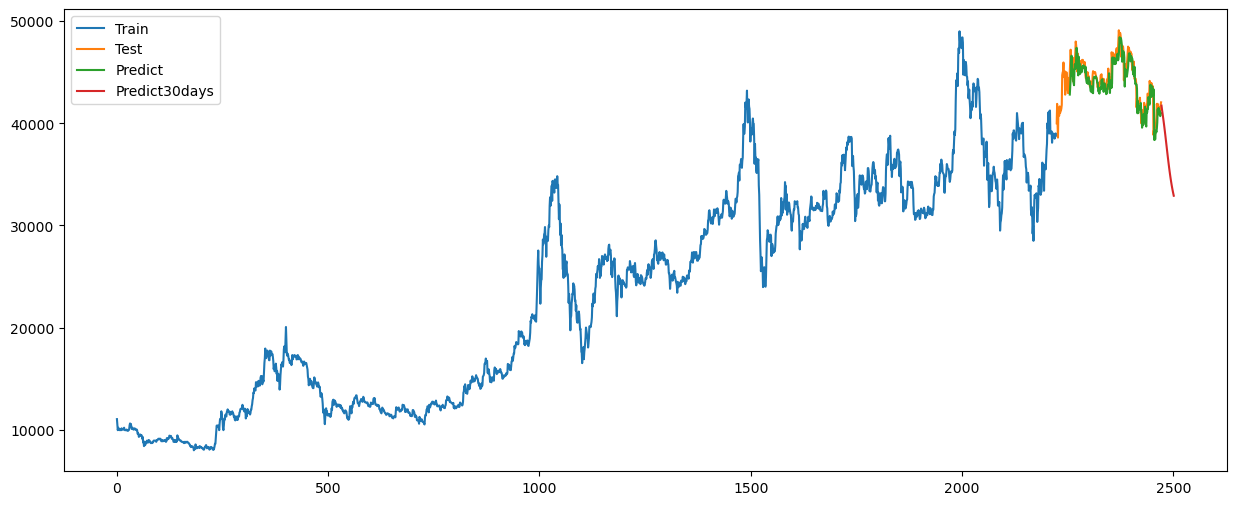

In [42]:
# Plot 
plt.figure(figsize=(15, 6))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+31, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred_lstm)

predict_data_index = pd.RangeIndex(start=len(df), stop=len(df)+30, step=1)
plt.plot(predict_data_index, scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()